In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import json
import numpy as np

## Post processing framework

In [2]:
from xppbe.Simulation import Simulation
from xppbe import xppbe_path

simulation_name = 'A1_FCNN'

results_path = os.path.join(xppbe_path,'results',simulation_name)
yaml_file = os.path.join(results_path,simulation_name+'.yaml')


simulation = Simulation(yaml_file, results_path=xppbe_path)

simulation.create_simulation()
print(simulation.domain_properties)

2024-05-21 23:09:18.329138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 23:09:23.491153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64/:/usr/lib/x86_64-linux-gnu
2024-05-21 23:09:23.491212: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-21 23:09:23.826300: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2

Number of vertices: 2366
Number of Faces: 4728
Number of Regions: 1
Number of Holes: 0
Region point: Tensor({0}:0.968493; {1}:2.35811; {2}:0.301777)
Number of vertices: 4928
Number of Faces: 9848
Number of Regions: 1
Number of Holes: 1
Region point: Tensor({0}:1.66022; {1}:0.367641; {2}:-0.481542)
Region point: Tensor({0}:-4.70371; {1}:7.41999; {2}:0.308681)


2024-05-21 23:10:29.591799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-21 23:10:29.592960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-21 23:10:29.593634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64/:/usr/lib/x86_64-linux-gnu
2024-05-21 23:10:29.593845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib

Mesh initialization ready
PDEs and datasets ready
{'molecule': 'arg', 'epsilon_1': 2, 'epsilon_2': 80, 'kappa': 0.125, 'T': 300}


In [3]:
Iter = 15000
simulation.load_model_for_Post(Iter, save=False)
Post = simulation.Post

In [7]:
simulation.XPINN_solver.iter

15000

(20000,)

In [4]:
Post.get_solvation_energy()

-128.2332319675778

In [6]:
phi_ens_pred_L = Post.get_phi_ens()
phi_ens_pred_L

[<tf.Tensor: shape=(), dtype=float32, numpy=-40.355297>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-50.954605>]

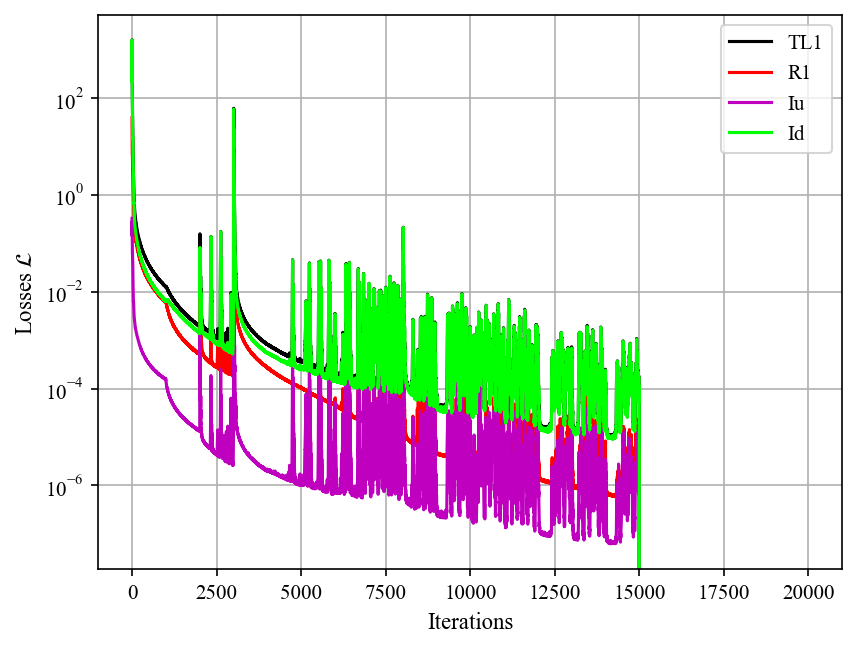

In [7]:
Post.plot_loss_history(domain=1);

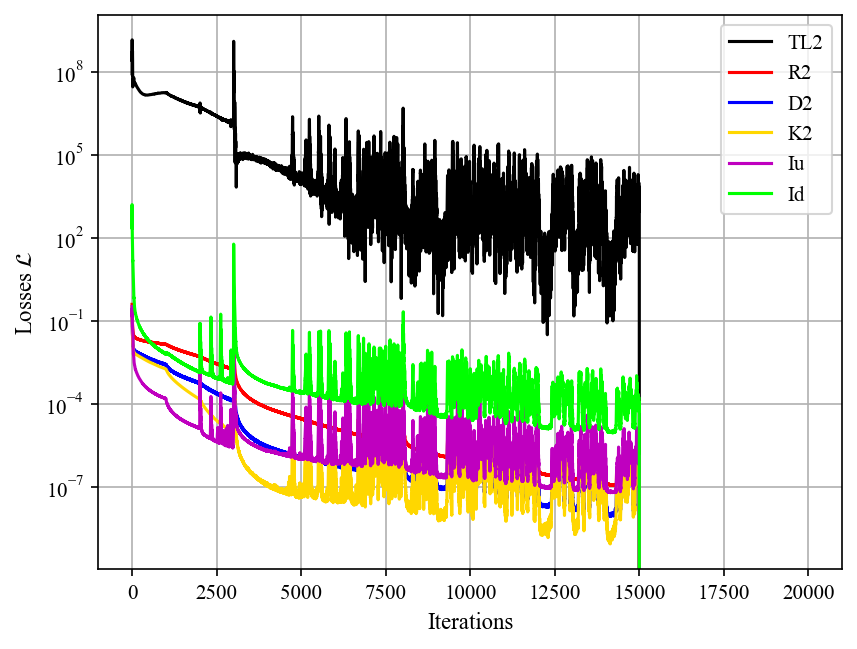

In [8]:
Post.plot_loss_history(domain=2);

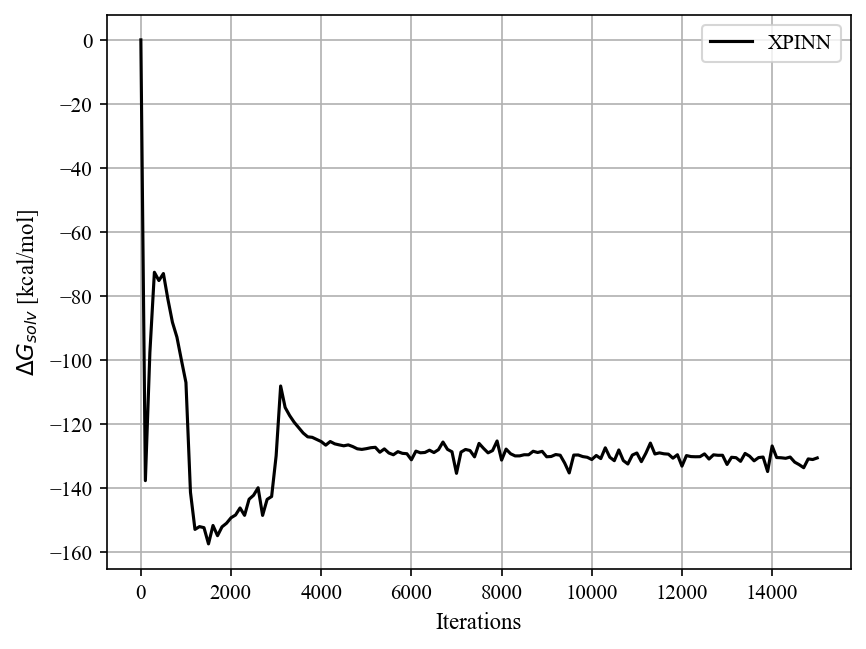

In [9]:
Post.plot_G_solv_history();

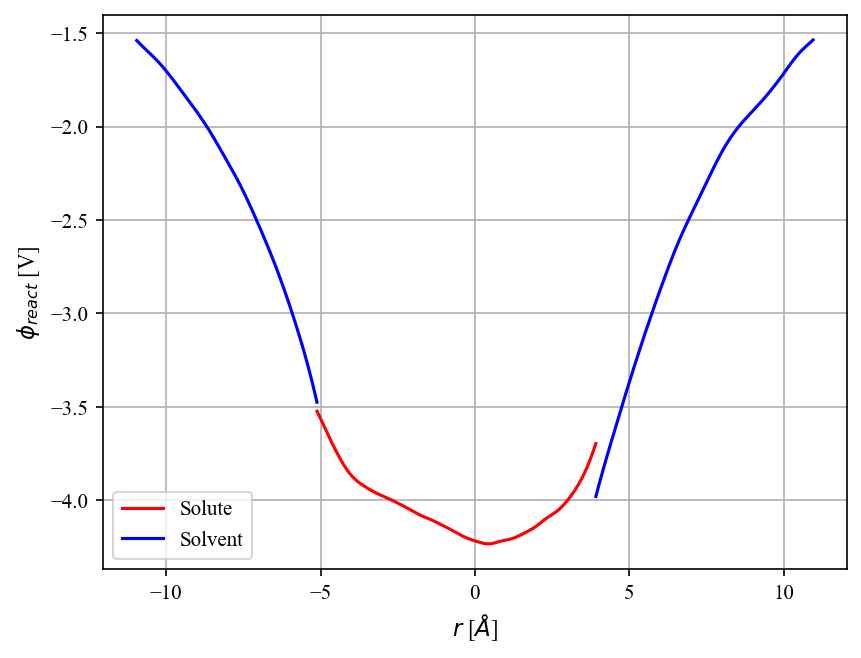

In [10]:
Post.plot_phi_line(value='react', theta=np.pi/2,phi=np.pi);

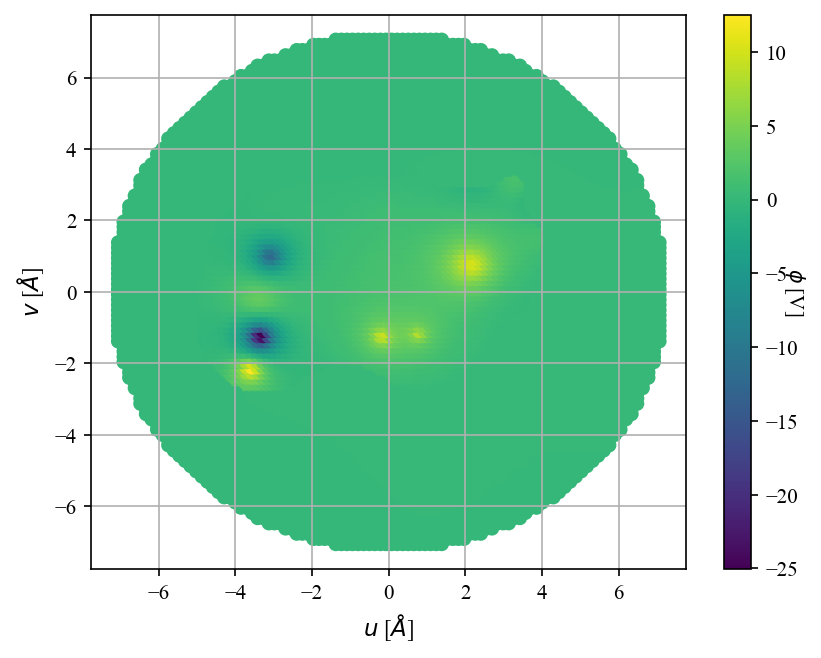

In [10]:
Post.plot_phi_contour();

In [ ]:
fig,ax = Post.plot_phi_line_aprox_known('Spherical_Harmonics', value='react');
ax.set_ylim([-0.3,0])




 <<INFO>> Starting NanoShaper 0.7.8
 <<INFO>> Loading atoms....
 <<INFO>> Read 27 atoms
 <<INFO>> Geometric baricenter ->  -0.136 0.5195 0.4945
 <<INFO>> Grid is 31
 <<INFO>> MAX 5.22114 5.87664 5.85164
 <<INFO>> MIN -5.49314 -4.83764 -4.86264
 <<INFO>> Perfil 90 %
 <<INFO>> Rmaxdim 10.065
 <<INFO>> Allocating memory...ok!
 <<INFO>> Initialization completed
 <<INFO>> Adjusting self intersection grid 
 <<INFO>> Self intersection grid is (before) 7
 <<INFO>> Self intersection grid is 4
 <<INFO>> Allocating self intersection grid....ok!
 <<INFO>> Computing alpha shape complex....ok!
 <<INFO>> Checking 0 probes for self intersections...ok!
 <<INFO>> Surface build-up time.. 0 [s]
 <<INFO>> Probe Radius value 1.4
 <<INFO>> Number of ses cells -> 117
 <<INFO>> Number of del_point cells -> 20
 <<INFO>> Number of regular del_edge cells -> 55
 <<INFO>> Number of singular del_edge cells -> 0
 <<INFO>> Number of regular del_facet cells -> 34
 <<INFO>> Number of singular del_facet cells -> 4
 <<I

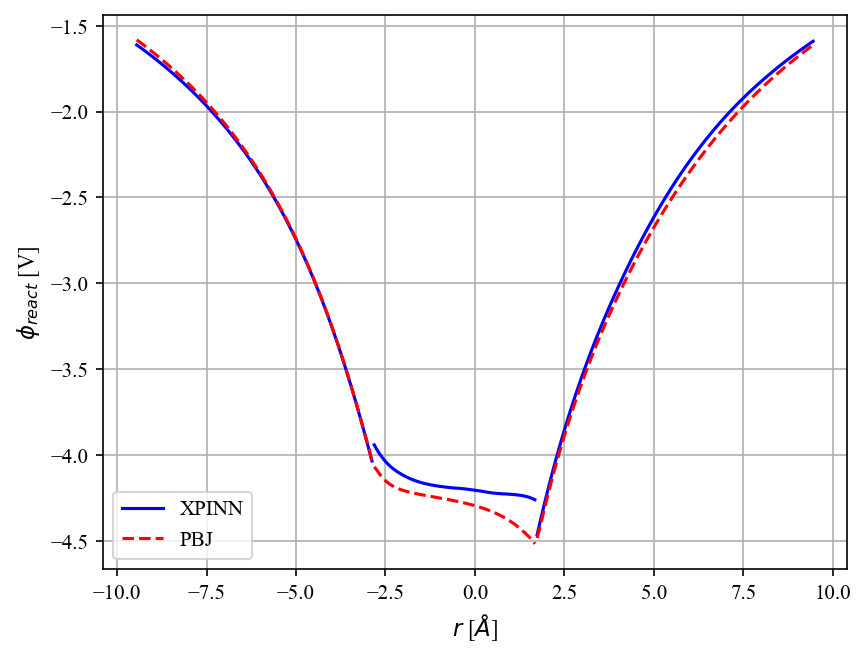

In [11]:
Post.plot_phi_line_aprox_known('PBJ', value='react');

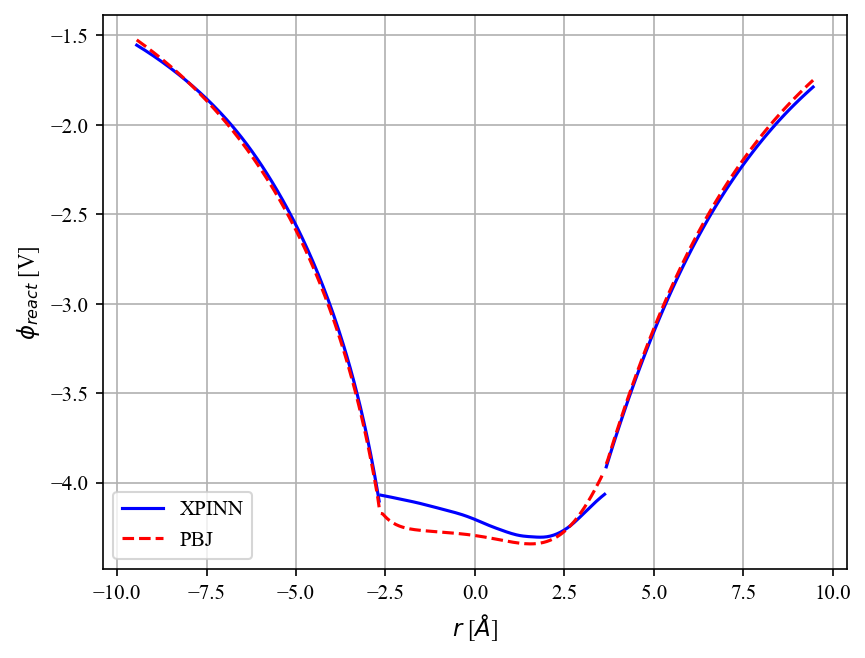

In [12]:
Post.plot_phi_line_aprox_known('PBJ', value='react', theta=np.pi/2, N=400);

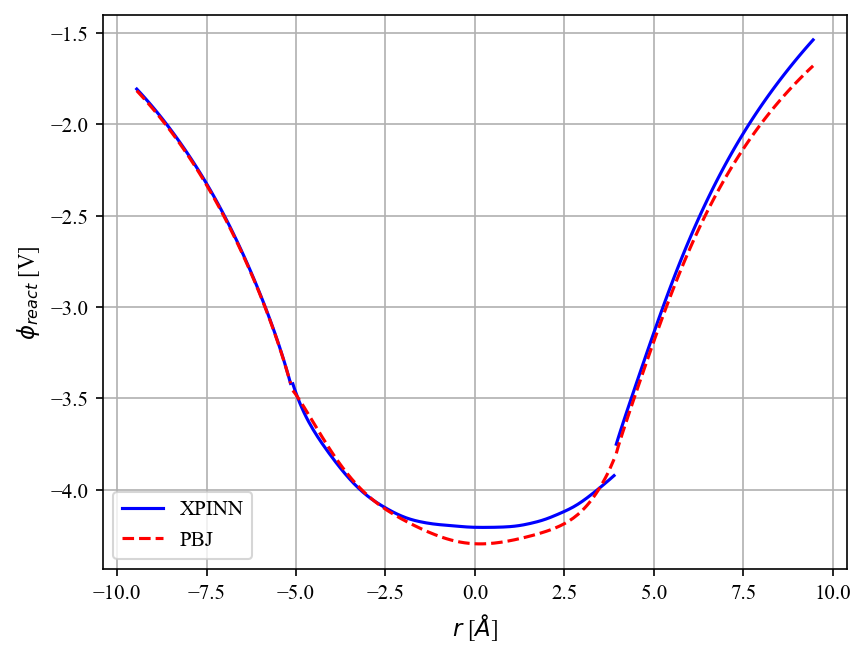

In [13]:
Post.plot_phi_line_aprox_known('PBJ', value='react', theta=np.pi/2, phi=np.pi);

In [17]:
Post.plot_interface_3D(jupyter=True);

In [18]:
Post.plot_interface_3D_known(Post.PDE.pbj_phi,Post.PDE.pbj_vertices,Post.PDE.pbj_elements);

In [10]:
Post.PDE.pbj_obj.calculate_solvation_energy()

-137.74097967062843

In [9]:
Post.PDE.pbj_obj.calculate_potential_ens()

array([16.14418169, 14.71019668])